In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
import pickle

# Other Packages
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import
train = pd.read_csv("/content/drive/MyDrive/SEM_2_PROJECT/datasets/train.csv")
test = pd.read_csv("/content/drive/MyDrive/SEM_2_PROJECT/datasets/test.csv")
stores = pd.read_csv("/content/drive/MyDrive/SEM_2_PROJECT/datasets/stores.csv")
holiday_events = pd.read_csv("/content/drive/MyDrive/SEM_2_PROJECT/datasets/holidays_events.csv")
oil = pd.read_csv("/content/drive/MyDrive/SEM_2_PROJECT/datasets/oil.csv")
transaction = pd.read_csv("/content/drive/MyDrive/SEM_2_PROJECT/datasets/transactions.csv")

In [ ]:
datasets = [("train", train),
    ("test", test),
    ("stores", stores),
    ("holiday_events", holiday_events),
    ("oil", oil),
    ("transaction", transaction)
]

for name, dataset in datasets:
    print(f"{name}:\n{dataset.head()}\n")

train:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

test:
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

stores:
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito        

In [ ]:
# Print out the shapes of the train and test datasets
print(f"Train Dataset: {train.shape}")
print(f"Test Datasets: {test.shape}")

Train Dataset: (3000888, 6)
Test Datasets: (28512, 5)


In [ ]:
# Print out the shapes of the other datasets
print("Shapes of Each Dataset:")
print(f"Holiday Events Dataset: {holiday_events.shape}")
print(f"Oil Dataset: {oil.shape}")
print(f"Stores Dataset: {stores.shape}")
print(f"Transactions Dataset: {transaction.shape}")

Shapes of Each Dataset:
Holiday Events Dataset: (350, 6)
Oil Dataset: (1218, 2)
Stores Dataset: (54, 5)
Transactions Dataset: (83488, 3)


# check the data types of columns
### converting 'date' column data type from object to date

In [ ]:
for name, dataset in datasets:
    print(f"{name}:\n\n{dataset.dtypes}\n")

train:

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

test:

id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object

stores:

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

holiday_events:

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object

oil:

date           object
dcoilwtico    float64
dtype: object

transaction:

date            object
store_nbr        int64
transactions     int64
dtype: object



In [ ]:
import pandas as pd

datasets = [
    ("train", train),
    ("test", test),
    ("holiday_events", holiday_events),
    ("stores",stores),
    ("oil", oil),
    ("transaction", transaction)
]

for name, dataset in datasets:
    if 'date' in dataset.columns:  # Check if the dataset contains a 'date' column
        dataset['date'] = pd.to_datetime(dataset['date']) #changing it to date data type

In [ ]:
for name, dataset in datasets:
    print(f"{name}:\n\n{dataset.dtypes}\n")

train:

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

test:

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
onpromotion             int64
dtype: object

holiday_events:

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object

stores:

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object

oil:

date          datetime64[ns]
dcoilwtico           float64
dtype: object

transaction:

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object



### checking for null values and replacing it with backward fill

In [ ]:
for name, dataset in datasets:
    print(f"Dataset: {name}")
    null_counts = dataset.isnull().sum()
    if null_counts.sum() > 0:
        print("Null values found:")
        print(null_counts)
    else:
        print("No null values found.")
    print()  # Add a newline for readability


Dataset: train
No null values found.

Dataset: test
No null values found.

Dataset: holiday_events
No null values found.

Dataset: stores
No null values found.

Dataset: oil
Null values found:
date           0
dcoilwtico    43
dtype: int64

Dataset: transaction
No null values found.



In [ ]:
# Fill null values using backward fill (bfill)
oil['dcoilwtico'].fillna(method='bfill', inplace=True)
print(oil.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


In [ ]:
# Check the completeness of the train dataset
min_date = train['date'].min()
max_date = train['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is incomplete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [ ]:
# Complete the missing dates in the train dataset
# Create an index of the missing dates as a DatetimeIndex object
missing_dates = pd.Index(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]')

# Create a DataFrame with the missing dates, using the 'date' column
missing_data = pd.DataFrame({'date': missing_dates})

# Concatenate the original train dataset and the missing data DataFrame
# ignore_index=True ensures a new index is assigned to the resulting DataFrame
train = pd.concat([train, missing_data], ignore_index=True)

# Sort the DataFrame based on the 'date' column in ascending order
train.sort_values('date', inplace=True)

In [ ]:
# Check the completeness of the train dataset
min_date = train['date'].min()
max_date = train['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is complete. It includes all the required dates.


#### check for outliers

Dataset: train


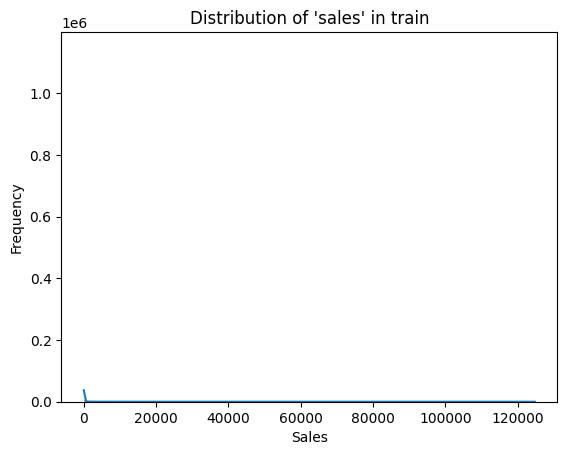

Detected outliers in 'sales':
              id       date  store_nbr         family     sales  onpromotion
564          564 2013-01-01         25      BEVERAGES   810.000            0
573          573 2013-01-01         25      GROCERY I   700.000            0
1785        1785 2013-01-02          1      BEVERAGES  1091.000            0
1789        1789 2013-01-02          1       CLEANING  1060.000            0
1790        1790 2013-01-02          1          DAIRY   579.000            0
...          ...        ...        ...            ...       ...          ...
3000863  3000863 2017-08-15          9          DAIRY   835.000           19
3000864  3000864 2017-08-15          9           DELI   551.713            7
3000867  3000867 2017-08-15          9      GROCERY I  6630.383           62
3000880  3000880 2017-08-15          9  PERSONAL CARE   522.000           11
3000885  3000885 2017-08-15          9        PRODUCE  2419.729          148

[447105 rows x 6 columns]


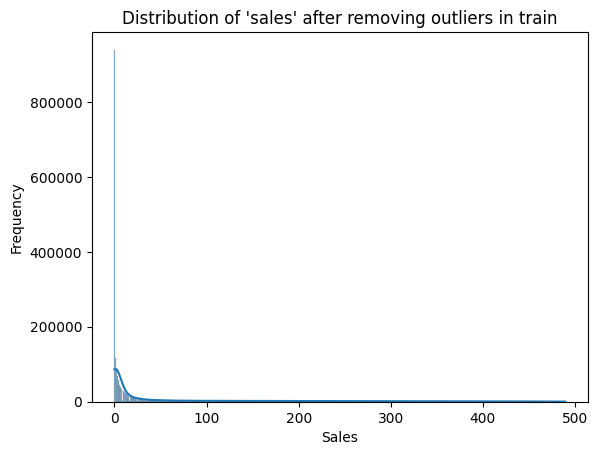


Dataset: test
No 'sales' column found in test, skipping outlier detection and treatment.

Dataset: holiday_events
No 'sales' column found in holiday_events, skipping outlier detection and treatment.

Dataset: stores
No 'sales' column found in stores, skipping outlier detection and treatment.

Dataset: oil
No 'sales' column found in oil, skipping outlier detection and treatment.

Dataset: transaction
No 'sales' column found in transaction, skipping outlier detection and treatment.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for name, dataset in datasets:
    print(f"Dataset: {name}")
    if 'sales' in dataset.columns:  # Assuming 'sales' is the column where outliers might exist
        # Visualize the distribution of 'sales' column
        sns.histplot(dataset['sales'], kde=True)
        plt.title(f"Distribution of 'sales' in {name}")
        plt.xlabel("Sales")
        plt.ylabel("Frequency")
        plt.show()

        # Detect outliers using statistical methods
        Q1 = np.percentile(dataset['sales'], 25)
        Q3 = np.percentile(dataset['sales'], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = dataset[(dataset['sales'] < lower_bound) | (dataset['sales'] > upper_bound)]
        print("Detected outliers in 'sales':")
        print(outliers)

        # Decide on outlier treatment based on domain knowledge
        # For example, let's say we decide to remove outliers
        cleaned_dataset = dataset[(dataset['sales'] >= lower_bound) & (dataset['sales'] <= upper_bound)]

        # Visualize the distribution after removing outliers
        sns.histplot(cleaned_dataset['sales'], kde=True)
        plt.title(f"Distribution of 'sales' after removing outliers in {name}")
        plt.xlabel("Sales")
        plt.ylabel("Frequency")
        plt.show()

    else:
        print(f"No 'sales' column found in {name}, skipping outlier detection and treatment.")
    print()  # Add a newline for readability


In [ ]:
def detect_outliers(data_name, data, threshold=1.5):
    outlier_columns = []
    numerical_columns = data.select_dtypes(include=[np.number]).columns

    # Set the figure size
    plt.figure(figsize=(12, 8))

    for col in numerical_columns:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Check if outliers exist
        outliers_exist = (data[col] < lower_bound) | (data[col] > upper_bound)

        # If outliers exist, add the column name to the list
        if outliers_exist.any():
            outlier_columns.append(col)

    # Plot boxplot for all numerical columns
    sns.boxplot(data=data[numerical_columns], width=0.5)
    plt.title(f"Boxplot of columns in '{data_name}'")
    plt.show()

    return outlier_columns

# Assuming datasets is defined as a list of tuples (data_name, data)
for data_name, data in datasets:
    print(f"Dataset: {data_name}")
    outliers


Dataset: train
Dataset: test
Dataset: holiday_events
Dataset: stores
Dataset: oil
Dataset: transaction


In [ ]:
import numpy as np

# Function to remove outliers from a specific column in a DataFrame
def remove_outliers_from_column(df, col):
    # Check if the column contains valid values
    if df[col].notnull().any():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    else:
        print(f"Column '{col}' contains no valid values.")
    return df


# Function to remove outliers from each dataset
def remove_outliers_from_datasets(datasets):
    for dataset_name, dataset in datasets.items():
        print(f"Processing dataset: {dataset_name}")
        outliers = dataset.get('outliers', {})
        for col, detected in outliers.items():
            if detected:
                print(f"Removing outliers from column '{col}'")
                dataset['data'] = remove_outliers_from_column(dataset['data'], col)
    print("Outliers removed from all datasets.")

# Example usage
datasets = {
    'train': {'data': train, 'outliers': {'sales': True, 'onpromotion': True}},
    'test': {'data': test, 'outliers': {'onpromotion': True}},
    'holiday_events': {'data': holiday_events, 'outliers': {}},
    'stores': {'data': stores, 'outliers': {}},
    'oil': {'data': oil, 'outliers': {}},
    'transaction': {'data': transaction, 'outliers': {'transactions': True}}
}

remove_outliers_from_datasets(datasets)


Processing dataset: train
Removing outliers from column 'sales'
Removing outliers from column 'onpromotion'
Column 'onpromotion' contains no valid values.
Processing dataset: test
Removing outliers from column 'onpromotion'
Processing dataset: holiday_events
Processing dataset: stores
Processing dataset: oil
Processing dataset: transaction
Removing outliers from column 'transactions'
Outliers removed from all datasets.


#### statistics of the datasets

In [ ]:
train.describe().T

,count,mean,min,25%,50%,75%,max,std
id,3000888.0,1500443.5,0.0,750221.75,1500443.5,2250665.25,3000887.0,866281.891642
date,3000892,2015-04-24 08:27:11.889184768,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,NaN
store_nbr,3000888.0,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
sales,3000888.0,357.775749,0.0,0.0,11.0,195.84725,124717.0,1101.997721
onpromotion,3000888.0,2.60277,0.0,0.0,0.0,0.0,741.0,12.218882


The interpretation of the summary statistics provided for each column is as follows:

1. **Count**: This indicates the number of non-null values in each column. For example, there are 3,000,888 non-null values for each of the columns: `id`, `store_nbr`, `sales`, and `onpromotion`.

2. **Mean**: This represents the average value of each column. For instance:
   - The average `id` is approximately 1,500,443.5.
   - The average `store_nbr` is approximately 27.5.
   - The average `sales` is approximately 357.78.
   - The average `onpromotion` is approximately 2.60.

3. **Std (Standard Deviation)**: This measures the dispersion or spread of the values around the mean. It provides information about the variability or volatility of the data. For example:
   - The standard deviation for `id` is approximately 866,281.89.
   - The standard deviation for `store_nbr` is approximately 15.59.
   - The standard deviation for `sales` is approximately 1,102.00.
   - The standard deviation for `onpromotion` is approximately 12.22.

4. **Min**: This represents the minimum value observed in each column. For instance:
   - The minimum `id` is 0.
   - The minimum `store_nbr` is 1.
   - The minimum `sales` is 0.00.
   - The minimum `onpromotion` is 0.00.

5. **25%**: This is the first quartile, also known as the lower quartile or 25th percentile. It indicates the value below which 25% of the data falls. For example:
   - 25% of `id` values are below approximately 750,221.75.
   - 25% of `store_nbr` values are below 14.00.
   - 25% of `sales` values are below 0.00 (since it's the minimum value).
   - 25% of `onpromotion` values are below 0.00 (since it's the minimum value).

6. **50%**: This is the second quartile, also known as the median or 50th percentile. It represents the middle value of the dataset. For example:
   - The median `id` is approximately 1,500,443.50.
   - The median `store_nbr` is 27.50.
   - The median `sales` is 11.00.
   - The median `onpromotion` is 0.00.

7. **75%**: This is the third quartile, also known as the upper quartile or 75th percentile. It indicates the value below which 75% of the data falls. For example:
   - 75% of `id` values are below approximately 2,250,665.25.
   - 75% of `store_nbr` values are below 41.00.
   - 75% of `sales` values are below 195.85.
   - 75% of `onpromotion` values are below 0.00 (since it's the maximum value).

8. **Max**: This represents the maximum value observed in each column. For instance:
   - The maximum `id` is 3,000,887.
   - The maximum `store_nbr` is 54.
   - The maximum `sales` is 124,717.00.
   - The maximum `onpromotion` is 741.00.

These summary statistics provide insight into the central tendency, dispersion, and range of values within each column of the dataset.

In [ ]:
test.describe().T

,count,mean,min,25%,50%,75%,max,std
id,28512.0,3015143.5,3000888.0,3008015.75,3015143.5,3022271.25,3029399.0,8230.849774
date,28512,2017-08-23 12:00:00,2017-08-16 00:00:00,2017-08-19 18:00:00,2017-08-23 12:00:00,2017-08-27 06:00:00,2017-08-31 00:00:00,NaN
store_nbr,28512.0,27.5,1.0,14.0,27.5,41.0,54.0,15.586057
onpromotion,28512.0,6.965383,0.0,0.0,0.0,6.0,646.0,20.683952


The interpretation of the summary statistics provided for each column is as follows:

1. **Count**: This indicates the number of non-null values in each column. For example, there are 28,512 non-null values for each of the columns: `id`, `store_nbr`, and `onpromotion`.

2. **Mean**: This represents the average value of each column. For instance:
   - The average `id` is approximately 3,015,143.5.
   - The average `store_nbr` is approximately 27.5.
   - The average `onpromotion` is approximately 6.97.

3. **Std (Standard Deviation)**: This measures the dispersion or spread of the values around the mean. It provides information about the variability or volatility of the data. For example:
   - The standard deviation for `id` is approximately 8,230.85.
   - The standard deviation for `store_nbr` is approximately 15.59.
   - The standard deviation for `onpromotion` is approximately 20.68.

4. **Min**: This represents the minimum value observed in each column. For instance:
   - The minimum `id` is 3,000,888.00.
   - The minimum `store_nbr` is 1.00.
   - The minimum `onpromotion` is 0.00.

5. **25%**: This is the first quartile, also known as the lower quartile or 25th percentile. It indicates the value below which 25% of the data falls. For example:
   - 25% of `id` values are below approximately 3,008,015.75.
   - 25% of `store_nbr` values are below 14.00.
   - 25% of `onpromotion` values are below 0.00.

6. **50%**: This is the second quartile, also known as the median or 50th percentile. It represents the middle value of the dataset. For example:
   - The median `id` is approximately 3,015,143.50.
   - The median `store_nbr` is 27.50.
   - The median `onpromotion` is 0.00.

7. **75%**: This is the third quartile, also known as the upper quartile or 75th percentile. It indicates the value below which 75% of the data falls. For example:
   - 75% of `id` values are below approximately 3,022,271.25.
   - 75% of `store_nbr` values are below 41.00.
   - 75% of `onpromotion` values are below 6.00.

8. **Max**: This represents the maximum value observed in each column. For instance:
   - The maximum `id` is 3,029,399.00.
   - The maximum `store_nbr` is 54.00.
   - The maximum `onpromotion` is 646.00.

These summary statistics provide insight into the central tendency, dispersion, and range of values within each column of the dataset.

#### Merging Datasets for Comprehensive Analysis

In [ ]:
#Merging the common columns ('store_nbr' and 'date') in the datasets using the inner merge() function
#Merge train_df with stores_df based on 'store_nbr' column
merged_df1 = train.merge(stores, on='store_nbr', how='inner')
#Merge merged_df1 with transactions_df based on 'date' and 'store_nbr' columns
merged_df2= merged_df1.merge(transaction, on=['date', 'store_nbr'], how='inner')
#Merge merged_df2 with holidays_events_df based on 'date' column
merged_df3= merged_df2.merge (holiday_events, on='date', how='inner')
#Merge merged_df3 with oil_df based on 'date' column
merged_df= merged_df3. merge(oil, on='date', how='inner')
#View the first five rows of the merged dataset
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [ ]:
#checking the column information od the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  float64       
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  float64       
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  float64       
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   type_x        322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  transactions  322047 non-null  int64         
 11  type_y        322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

In [ ]:
#checing for unique values of two unknown columns type_x,type_y (they were renamed)
# they represent the store type(type_x) and holiday type(type_y)

print("Unique values of 'type_x'")
print(merged_df['type_x'].unique())
print("Unique values of 'type_y'")
print(merged_df['type_y'].unique())

Unique values of 'type_x'
['D' 'E' 'C' 'A' 'B']
Unique values of 'type_y'
['Holiday' 'Additional' 'Transfer' 'Event' 'Bridge']


In [ ]:
#renaming the columns accordingly
merged_df = merged_df.rename(columns={"type_x":"store_type", "type_y":"holiday_type"})
merged_df.head(5)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


###  Summary Statistics and Data Consistency for merged data

In [ ]:
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,322047.0,1682979.459576,561.0,1010616.5,1842406.0,2209555.5,3000887.0,786249.257767
date,322047,2015-08-04 23:49:57.971103488,2013-01-01 00:00:00,2014-07-23 00:00:00,2015-11-02 00:00:00,2016-05-27 00:00:00,2017-08-15 00:00:00,NaN
store_nbr,322047.0,26.994672,1.0,13.0,27.0,40.0,54.0,15.595174
sales,322047.0,406.383452,0.0,1.0,19.0,241.260505,124717.0,1246.88124
onpromotion,322047.0,3.727136,0.0,0.0,0.0,1.0,716.0,15.512095
cluster,322047.0,8.531202,1.0,4.0,9.0,13.0,17.0,4.713809
transactions,322047.0,1734.11784,54.0,1030.0,1409.0,2148.0,8359.0,1050.335018
dcoilwtico,322047.0,63.636381,27.96,44.88,51.98,94.09,107.95,24.855753


### checking for missing values, duplicate values

In [ ]:
missing_values = merged_df.isnull().sum()
missing_values

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64

In [ ]:
duplicate_rows_merged = merged_df.duplicated()
duplicate_rows_merged.sum()

0

In [ ]:
duplicated_rows_test = merged_df.duplicated()
duplicated_rows_test.sum()

0

#### Saving the Merged Dataset

In [ ]:
merged_df.to_csv("/content/drive/MyDrive/SEM_2_PROJECT/datasets/visualization_Data.csv",index = False)
merged_df.head(5)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


#  Creating a Copy of the Merged Dataset

In [ ]:
# create a copy of the merged dataset
merged_df_copy = merged_df.copy()

In [ ]:
merged_df_copy

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.00000,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73085.0,2013-02-11,1.0,MAGAZINES,0.00000,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.00000,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73083.0,2013-02-11,1.0,LINGERIE,0.00000,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.00000,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,1297888.0,2015-01-01,25.0,SCHOOL AND OFFICE SUPPLIES,0.00000,0.0,Salinas,Santa Elena,D,1,2202,Holiday,National,Ecuador,Primer dia del ano,False,52.72
322043,1297887.0,2015-01-01,25.0,PRODUCE,105.00000,0.0,Salinas,Santa Elena,D,1,2202,Holiday,National,Ecuador,Primer dia del ano,False,52.72
322044,1297886.0,2015-01-01,25.0,PREPARED FOODS,121.94100,0.0,Salinas,Santa Elena,D,1,2202,Holiday,National,Ecuador,Primer dia del ano,False,52.72
322045,1297885.0,2015-01-01,25.0,POULTRY,279.16998,0.0,Salinas,Santa Elena,D,1,2202,Holiday,National,Ecuador,Primer dia del ano,False,52.72


# Univariate, Multivariate, and Bivariate Analysis

### 1. Univariate Analysis

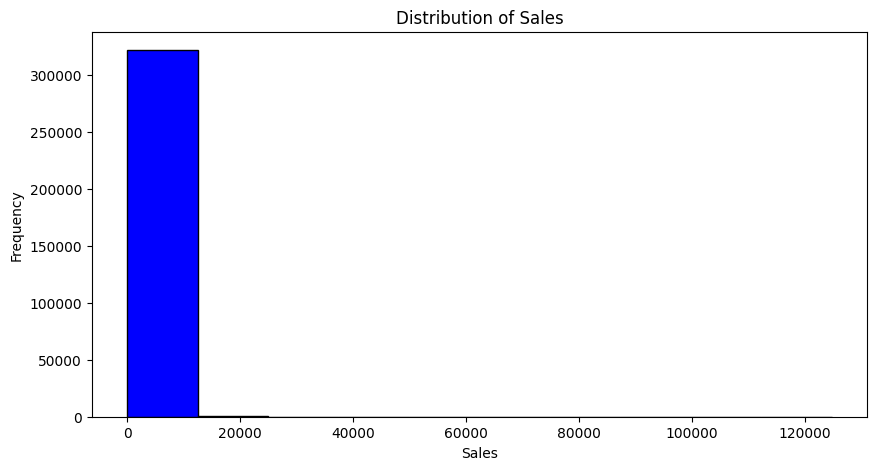

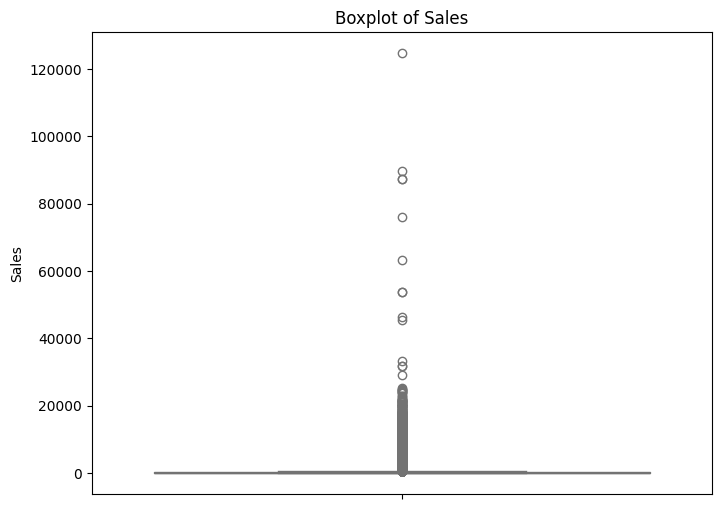

In [ ]:
# a. Distribution of the ‘Sales’ Variable

# Plotting histogram
plt.figure(figsize=(10, 5))
plt.hist(merged_df['sales'],bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Plotting boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['sales'], color='lightgreen', orient='v')
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.show()



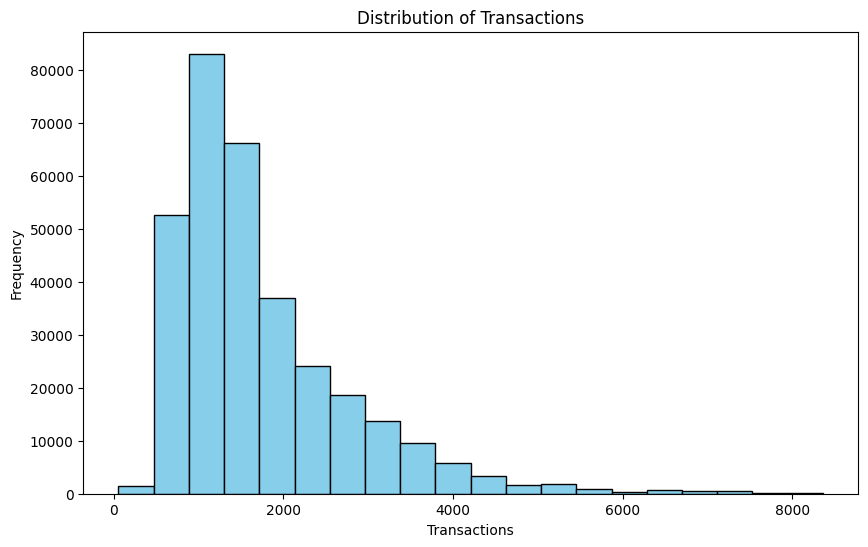

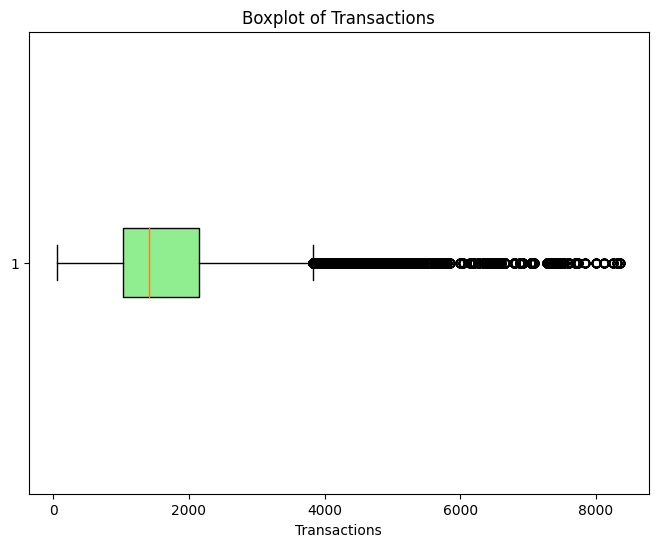

In [ ]:
# b. distribution of the ‘transactions’ variable
# Plotting histogram for transactions
plt.figure(figsize=(10, 6))
plt.hist(merged_df['transactions'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Transactions')
plt.xlabel('Transactions')
plt.ylabel('Frequency')
plt.show()

# Plotting boxplot for transactions
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['transactions'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Transactions')
plt.xlabel('Transactions')
plt.show()


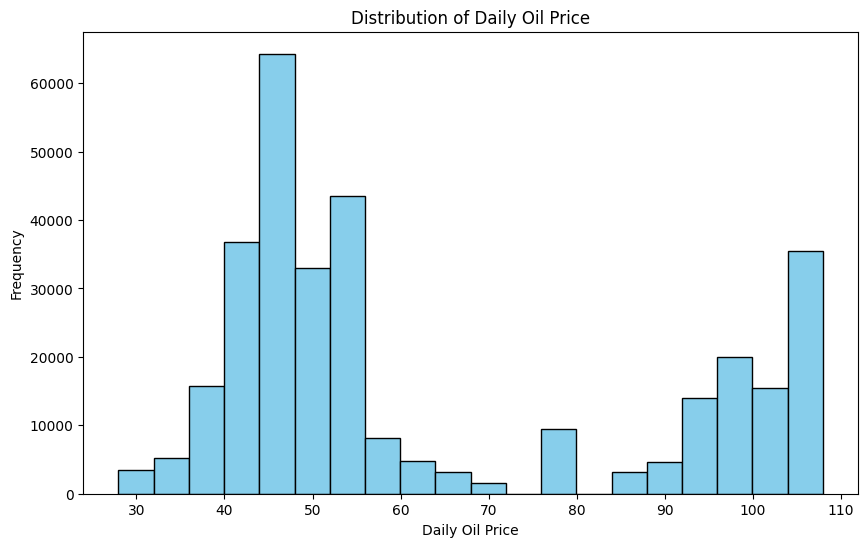

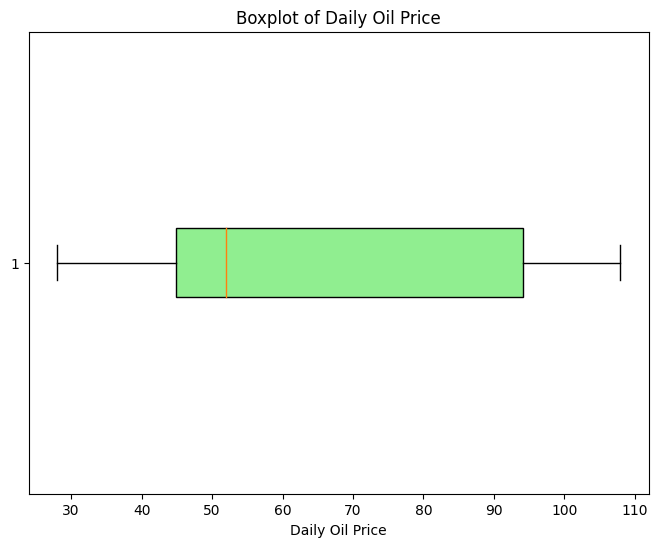

In [ ]:
# c. Distribution of the ‘Daily Oil Price’ variable
import matplotlib.pyplot as plt

# Plotting histogram for Daily Oil Price
plt.figure(figsize=(10, 6))
plt.hist(merged_df['dcoilwtico'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Oil Price')
plt.xlabel('Daily Oil Price')
plt.ylabel('Frequency')
plt.show()

# Plotting boxplot for Daily Oil Price
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['dcoilwtico'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Daily Oil Price')
plt.xlabel('Daily Oil Price')
plt.show()


# 2. Bivariate Analysis

### a. Trend of Sales Over Time

In [ ]:
#grouping the data by date and calculating the total sales
daily_group_sales = merged_df.groupby('date')['sales'].sum().reset_index()

In [ ]:
#creating a time series plot with slider
fig = px.line (daily_group_sales, x='date', y='sales')
fig.update_xaxes (rangeslider_visible=True)
fig.update_layout (title='Trend of Sales Over Time', title_x=0.5)
fig.show()

### b. Trend of Daily Crude Oil Prices Over Time

In [ ]:
# Visualizing the 'dcoilwtico' column to confirm if the trend is consistent.
fig = px.line(oil, x='date', y='dcoilwtico')
fig.update_layout(title='Trend of Oil Prices Over Time', title_x=0.5, xaxis_title='Date', yaxis_title='Oil Price')
fig.show()

### c. Total Count of Sales by Store Type

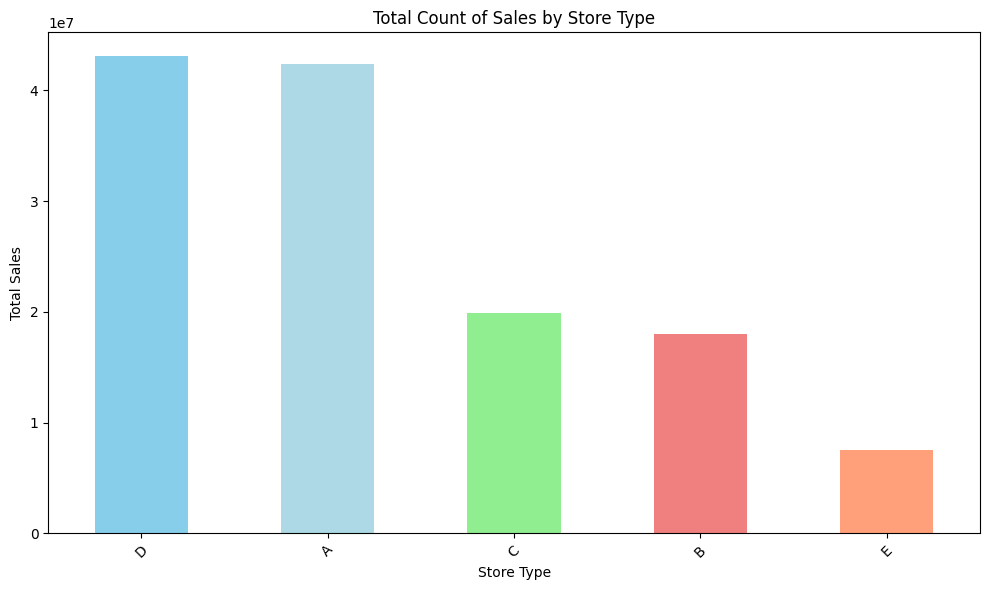

In [ ]:
# Calculate total sales by store type
sales_by_store_type = merged_df_copy.groupby('store_type')['sales'].sum().sort_values(ascending=False)
colors = ['skyblue','lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']
# Plotting total count of sales by store type
plt.figure(figsize=(10, 6))
sales_by_store_type.plot(kind='bar', color=colors)
plt.title('Total Count of Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### d. Total Amount in Sales by Store Type

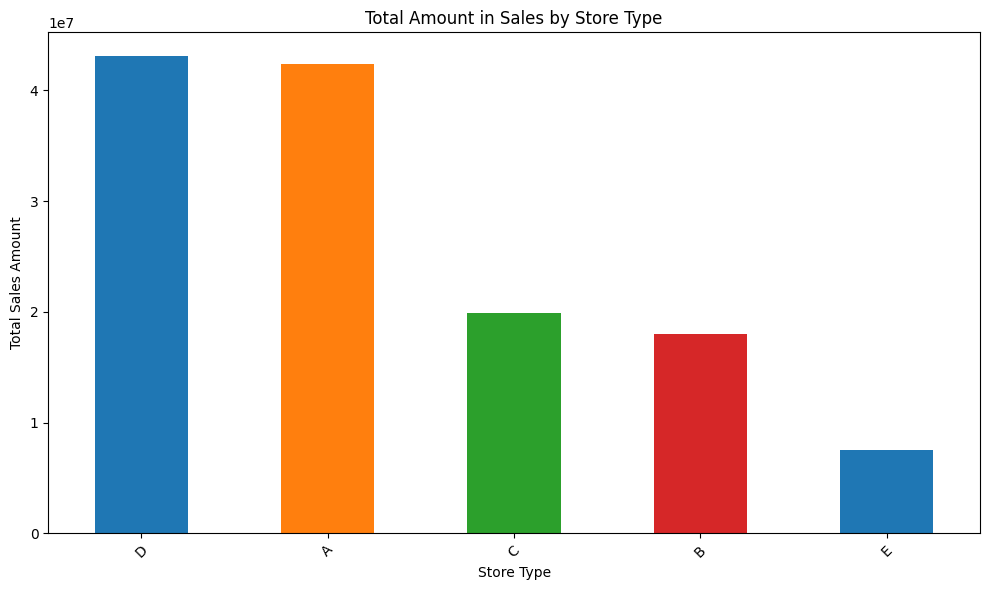

In [ ]:
# Define darker colors for each store type
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Calculate total sales amount by store type
sales_amount_by_store_type = merged_df_copy.groupby('store_type')['sales'].sum().sort_values(ascending=False)

# Plotting total amount in sales by store type with dark colors for each bar
plt.figure(figsize=(10, 6))
sales_amount_by_store_type.plot(kind='bar', color=colors)
plt.title('Total Amount in Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### e. Average Sales by City

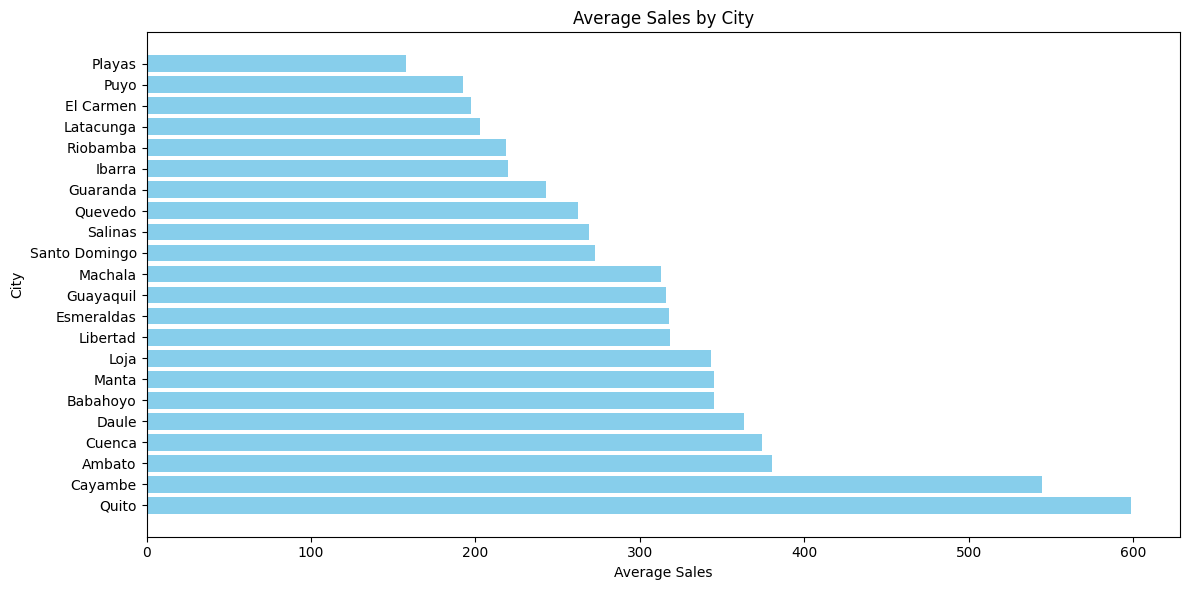

In [ ]:
# Calculate average sales by city
average_sales_by_city = merged_df_copy.groupby('city')['sales'].mean().sort_values(ascending=False)

# Plotting average sales by city with cities on y-axis and sales on x-axis
plt.figure(figsize=(12, 6))
plt.barh(np.arange(len(average_sales_by_city)), average_sales_by_city.values, color='skyblue')
plt.yticks(np.arange(len(average_sales_by_city)), average_sales_by_city.index)
plt.title('Average Sales by City')
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### f. Average Sales by State

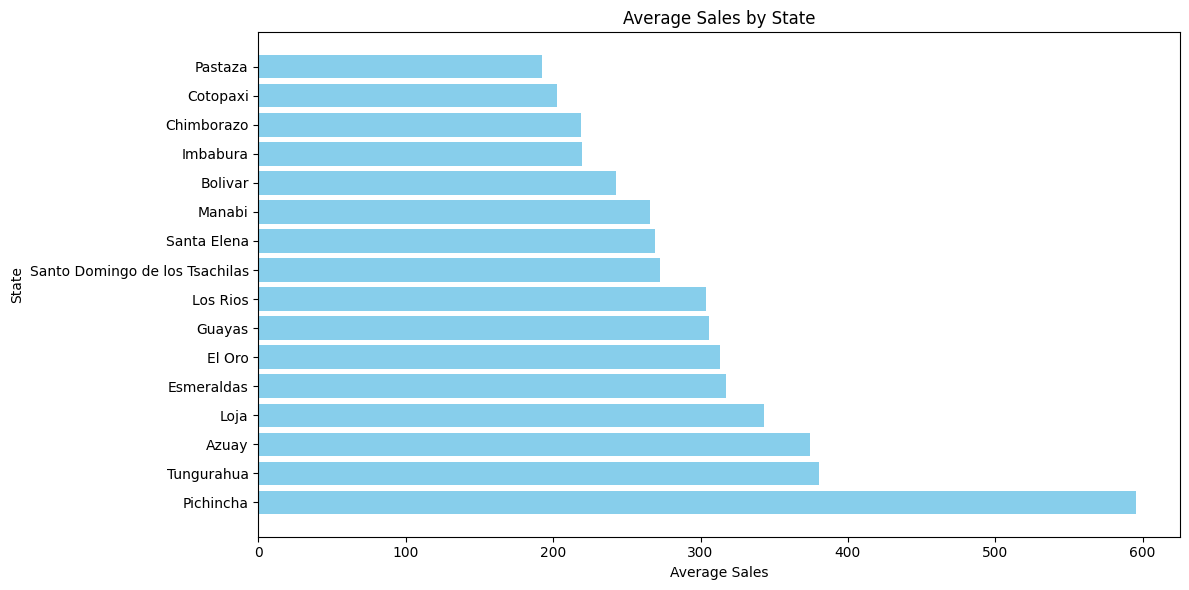

In [ ]:
average_sales_by_state = merged_df_copy.groupby('state')['sales'].mean().sort_values(ascending=False)

# Plotting average sales by city with cities on y-axis and sales on x-axis
plt.figure(figsize=(12, 6))
plt.barh(np.arange(len(average_sales_by_state)), average_sales_by_state.values, color='skyblue')
plt.yticks(np.arange(len(average_sales_by_state)), average_sales_by_state.index)
plt.title('Average Sales by State')
plt.xlabel('Average Sales')
plt.ylabel('State')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### g. Relationship Between Sales and Transactions.

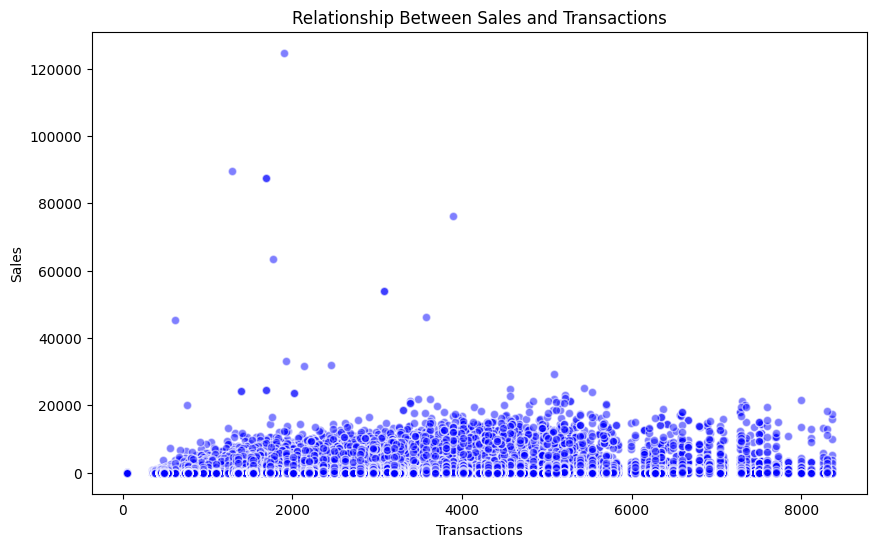

In [ ]:
# Plotting the scatter plot for sales and transactions
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_copy['transactions'], merged_df_copy['sales'], color='blue', alpha=0.5, edgecolor='white')
plt.title('Relationship Between Sales and Transactions')
plt.xlabel('Transactions')
plt.ylabel('Sales')
plt.show()


# 3. Multivariate Analysis

### a. Correlation Matrix of Numerical Variables

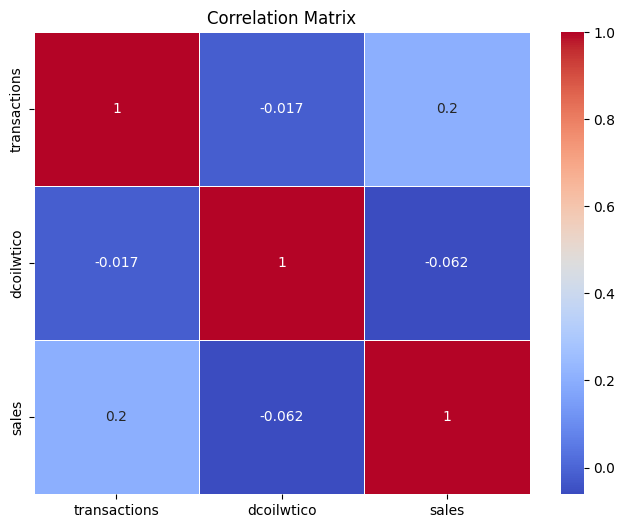

In [ ]:
# Calculate correlation matrix
corr_matrix = merged_df_copy[['transactions','dcoilwtico','sales']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


-- Correlations were generally weak, indicating that relationships between variables were not strong. For instance, sales exhibited a slight positive correlation with transactions.

# b. Scatter Plot Matrix of Numerical Variables

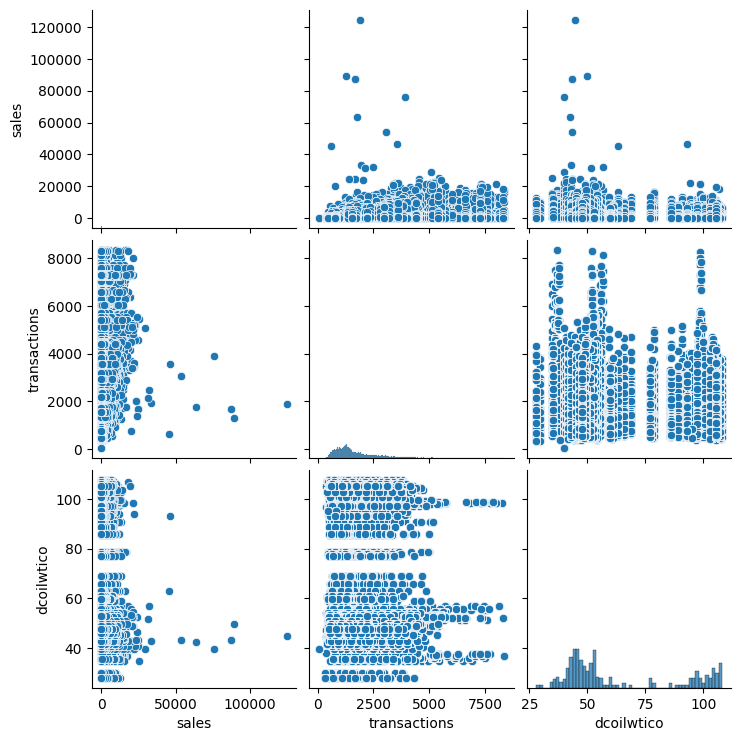

In [ ]:
# Plot scatter plot matrix
sns.pairplot(merged_df[['sales', 'transactions', 'dcoilwtico']], palette='red')
plt.show()

# **Stationarity Test**

-- *Stationarity implies that the statistical properties of the time series, such as mean and variance, remain constant over time. In this case, I performed the Augmented Dickey-Fuller (ADF) test to check for stationarity in the ‘sales’ data from the ‘merged_df’ dataset.*

**Null hypothesis (H0): The sales data is non-stationary.**

**Alternative hypothesis (H1): The sales data is stationary**

In [ ]:
# # Statistical Test of the 'sales' column in the merged_df using Adfuller
# sales_data = merged_df['sales']

# # Perform ADF test
# result = adfuller(sales_data)

# # Extract the test statistics and p-value from the result
# test_statistic = result[0]
# p_value = result[1]
# critical_values = result[4]

# # Print the test statistics and critical values
# print(f"ADF Test Statistics: {test_statistic}")
# print(f"P-value: {p_value}")
# print("Critical Values:")
# for key, value in critical_values.items():
#     print(f"   {key}: {value}")

# # Check the p-value against a significance level (e.g., 0.05)
# if p_value <= 0.05:
#     print("Reject the null hypothesis: The sales data is stationary.")
# else:
#     print("Fail to reject the null hypothesis: The sales data is non-stationary.")


*Based on the ADF test, the test statistics (-43.83) is significantly lower than the critical values at all confidence levels (1%, 5%, and 10%). Additionally, the p-value is 0.0, which is lower than the significance level of 0.05. Since the p-value is less than 0.05, we reject the null hypothesis, indicating that the sales data is stationary.*

## 4. Feature Engineering

# 4.1. Train Dataset

4.1.1. Extracting Date Components (Day, Month, Year and Day of The Week).

In [ ]:
# Extracting Date Components
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day

In [ ]:
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day
0,73062.0,2013-02-11,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
1,73085.0,2013-02-11,1.0,MAGAZINES,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
2,73084.0,2013-02-11,1.0,"LIQUOR,WINE,BEER",21.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
3,73083.0,2013-02-11,1.0,LINGERIE,0.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11
4,73082.0,2013-02-11,1.0,LAWN AND GARDEN,3.0,0.0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01,2013,2,11


4.1.2. Dropping Unnecessary Columns in The Merged Dataset

In [ ]:
merged_df_copy['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int32)

In [ ]:
columns_to_drop = ['date', 'id', 'locale', 'locale_name', 'description', 'store_type', 'transferred', 'state']
merged_df_copy = merged_df_copy.drop(columns=columns_to_drop)

4.1.3. Product Categorization Based on Families


In [ ]:
unique_families = merged_df_copy['family'].unique()
unique_families

array(['AUTOMOTIVE', 'MAGAZINES', 'LIQUOR,WINE,BEER', 'LINGERIE',
       'LAWN AND GARDEN', 'LADIESWEAR', 'HOME CARE', 'HOME APPLIANCES',
       'HOME AND KITCHEN II', 'HOME AND KITCHEN I', 'HARDWARE',
       'GROCERY II', 'MEATS', 'GROCERY I', 'EGGS', 'DELI', 'DAIRY',
       'CLEANING', 'CELEBRATION', 'BREAD/BAKERY', 'BOOKS', 'BEVERAGES',
       'BEAUTY', 'BABY CARE', 'FROZEN FOODS', 'PERSONAL CARE',
       'PLAYERS AND ELECTRONICS', 'PET SUPPLIES', 'SEAFOOD',
       'SCHOOL AND OFFICE SUPPLIES', 'PRODUCE', 'PREPARED FOODS',
       'POULTRY'], dtype=object)

In [ ]:
# Define the category lists for each product category
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
clothing_families = ['LINGERIE', 'LADYSWARE']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE']
hardware_families = ['PLAYERS AND ELECTRONICS','HARDWARE']

# Categorize the 'family' column based on the product categories
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(food_families), 'FOODS', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(home_families), 'HOME', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(clothing_families), 'CLOTHING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(grocery_families), 'GROCERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(stationery_families), 'STATIONERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(cleaning_families), 'CLEANING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(hardware_families), 'HARDWARE', merged_df_copy['family'])

# Print the updated unique values
unique_families = merged_df_copy['family'].unique()
unique_families

array(['AUTOMOTIVE', 'STATIONERY', 'LIQUOR,WINE,BEER', 'CLOTHING',
       'LAWN AND GARDEN', 'LADIESWEAR', 'CLEANING', 'HOME', 'HARDWARE',
       'GROCERY', 'FOODS', 'CELEBRATION', 'BEAUTY', 'PET SUPPLIES'],
      dtype=object)

4.1.4. Feature Scaling

In [ ]:
num_cols = ['sales', 'transactions', 'dcoilwtico']

In [ ]:
# Define the number of bins for each numerical column
num_bins = 5

# Perform coarse binning for each numerical column
for col in num_cols:
    # Calculate bin edges using quantiles
    bins = pd.qcut(merged_df_copy[col], q=num_bins, labels=False, duplicates='drop')
    merged_df_copy[col] = bins

In [ ]:
merged_df_copy

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day
0,1.0,AUTOMOTIVE,0,0.0,Quito,13,0,Holiday,3,2013,2,11
1,1.0,STATIONERY,0,0.0,Quito,13,0,Holiday,3,2013,2,11
2,1.0,"LIQUOR,WINE,BEER",1,0.0,Quito,13,0,Holiday,3,2013,2,11
3,1.0,CLOTHING,0,0.0,Quito,13,0,Holiday,3,2013,2,11
4,1.0,LAWN AND GARDEN,0,0.0,Quito,13,0,Holiday,3,2013,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...
322042,25.0,STATIONERY,0,0.0,Salinas,1,3,Holiday,2,2015,1,1
322043,25.0,FOODS,2,0.0,Salinas,1,3,Holiday,2,2015,1,1
322044,25.0,FOODS,2,0.0,Salinas,1,3,Holiday,2,2015,1,1
322045,25.0,FOODS,2,0.0,Salinas,1,3,Holiday,2,2015,1,1


In [ ]:
# Now you can apply StandardScaler
scaler = StandardScaler()
merged_df_copy[num_cols] = scaler.fit_transform(merged_df_copy[num_cols])

In [ ]:
merged_df_copy

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day
0,1.0,AUTOMOTIVE,-1.022912,0.0,Quito,13,-1.413127,Holiday,0.717916,2013,2,11
1,1.0,STATIONERY,-1.022912,0.0,Quito,13,-1.413127,Holiday,0.717916,2013,2,11
2,1.0,"LIQUOR,WINE,BEER",-0.167247,0.0,Quito,13,-1.413127,Holiday,0.717916,2013,2,11
3,1.0,CLOTHING,-1.022912,0.0,Quito,13,-1.413127,Holiday,0.717916,2013,2,11
4,1.0,LAWN AND GARDEN,-1.022912,0.0,Quito,13,-1.413127,Holiday,0.717916,2013,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...
322042,25.0,STATIONERY,-1.022912,0.0,Salinas,1,0.707650,Holiday,0.008218,2015,1,1
322043,25.0,FOODS,0.688417,0.0,Salinas,1,0.707650,Holiday,0.008218,2015,1,1
322044,25.0,FOODS,0.688417,0.0,Salinas,1,0.707650,Holiday,0.008218,2015,1,1
322045,25.0,FOODS,0.688417,0.0,Salinas,1,0.707650,Holiday,0.008218,2015,1,1


4.1.5. Encoding The Categorical Variables

In [ ]:
# Define the categorical columns to encode
categorical_columns = ["family", "city", "holiday_type"]

# Perform one-hot encoding
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(merged_df_copy[categorical_columns])

# Create column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Convert the one-hot encoded data to a DataFrame
merged_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original dataframe with the one-hot encoded data
merged_df_encoded = pd.concat([merged_df_copy, merged_df_encoded], axis=1)

# Drop the original categorical columns
merged_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Print the head of the encoded DataFrame
merged_df_encoded.head()

,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,day,family_AUTOMOTIVE,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,1.0,-1.022912,0.0,13,-1.413127,0.717916,2013,2,11,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,-1.022912,0.0,13,-1.413127,0.717916,2013,2,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-0.167247,0.0,13,-1.413127,0.717916,2013,2,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,-1.022912,0.0,13,-1.413127,0.717916,2013,2,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,-1.022912,0.0,13,-1.413127,0.717916,2013,2,11,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


4.2. Test Dataset

4.2.1.

# 5.1. Data Splitting

In [ ]:
train_set = merged_df_encoded.loc[merged_df_encoded['year'].isin([2013, 2014, 2015, 2016])]
eval_set = merged_df_encoded.loc[merged_df_encoded['year'] == 2017]

My training set contains 284,889 samples, each with 51 features.

In [ ]:
train_set.shape

(284889, 50)

My evaluating set contains 37158 samples, each with 50 features.

In [ ]:
eval_set.shape

(37158, 50)

# 5.2. Data Separation

In [ ]:
# For the training set
X_train = train_set.drop('sales', axis=1)
y_train = train_set['sales']

In [ ]:
# For the evaluation set
X_eval = eval_set.drop('sales', axis=1)
y_eval = eval_set['sales']

5.3. Initializing the Results DataFrame

In [ ]:
# Initialize the results dataframe
results_df = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

5.4. Model Selection and Evaluation

5.4.1. Model 1: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import numpy as np
import pandas as pd

# Step 1: Data Preprocessing
# Assuming X_train, X_eval, y_train, y_eval are already defined

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# Step 2: Initialize and Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Step 3: Predictions and Evaluation
lr_predictions = lr_model.predict(X_eval_scaled)

# Calculate metrics
lr_mse = mean_squared_error(y_eval, lr_predictions)
lr_mae = mean_absolute_error(y_eval, lr_predictions)

# Apply the absolute value function to both y_eval and lr_predictions
y_eval_abs = abs(y_eval)
lr_predictions_abs = abs(lr_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
lr_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, lr_predictions_abs))

# Create a DataFrame to store results for Linear Regression
results_lr = pd.DataFrame({'Model': ['Linear Regression'],
                            'RMSLE': [lr_rmsle],
                            'RMSE': [np.sqrt(lr_mse)],
                            'MSE': [lr_mse],
                            'MAE': [lr_mae]}).round(2)

# Print the results_lr dataframe
print(results_lr)


               Model  RMSLE  RMSE   MSE   MAE
0  Linear Regression   0.25  0.59  0.35  0.45


In [ ]:
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# Initialize H2O cluster
h2o.init(ip="localhost", port=54321, enable_assertions=False, max_mem_size='16G', min_mem_size='6G', strict_version_check=False, extra_classpath=['/usr/local/cuda-12.2/targets/x86_64-linux/lib'])

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
x = train_h2o.columns[:-1]
y = train_h2o.columns[-1]

# Initialize and train Linear Regression model
lr_model = H2OGeneralizedLinearEstimator(family="gaussian", link="identity", nfolds=5)
lr_model.train(x=x, y=y, training_frame=train_h2o)

# Generate predictions on evaluation data
lr_predictions_h2o = lr_model.predict(eval_h2o)
lr_predictions = lr_predictions_h2o.as_data_frame()

# Calculate metrics
lr_mse = mean_squared_error(y_eval, lr_predictions)
lr_mae = mean_absolute_error(y_eval, lr_predictions)

# Apply the absolute value function to both y_eval and lr_predictions
y_eval_abs = abs(y_eval)
lr_predictions_abs = abs(lr_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
lr_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, lr_predictions_abs))

# Create a DataFrame to store results for Linear Regression
results_lr = pd.DataFrame({'Model': ['H2O Generalized Linear Regression'],
                            'RMSLE': [lr_rmsle],
                            'RMSE': [np.sqrt(lr_mse)],
                            'MSE': [lr_mse],
                            'MAE': [lr_mae]}).round(2)

# Print the results_lr dataframe
print(results_lr)

# Shutdown the H2O cluster
h2o.shutdown()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 45 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_7eatii
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |███████████████████████████████████████████████ (cancelled)  88%


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_892f906491fe70cefaa35a937e17459b> was cancelled by the user.

5.4.2. Model 2: Random Forest Regression

In [ ]:
# Concatenate both DataFrames
results_combined = pd.concat([results_lr, results_rf], ignore_index=True)

# Print the combined results dataframe
display(results_combined)


5.4.2. Model 2: Gradient Boosting

In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
x = train_h2o.columns[:-1]
y = train_h2o.columns[-1]

# Initialize and train Gradient Boosting Regression model
gbm_model = H2OGradientBoostingEstimator(ntrees=50, max_depth=10, learn_rate=0.1, seed=42)
gbm_model.train(x=x, y=y, training_frame=train_h2o)

# Generate predictions on evaluation data
gbm_predictions = gbm_model.predict(eval_h2o).as_data_frame()

# Calculate metrics
gbm_mse = mean_squared_error(y_eval, gbm_predictions)
gbm_mae = mean_absolute_error(y_eval, gbm_predictions)

# Apply the absolute value function to both y_eval and gbm_predictions
y_eval_abs = abs(y_eval)
gbm_predictions_abs = abs(gbm_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
gbm_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, gbm_predictions_abs))

# Create a DataFrame to store results for Gradient Boosting
results_gbm = pd.DataFrame({'Model': ['H2O Gradient Boosting'],
                            'RMSLE': [gbm_rmsle],
                            'RMSE': [np.sqrt(gbm_mse)],
                            'MSE': [gbm_mse],
                            'MAE': [gbm_mae]}).round(2)

# Print the results_gbm dataframe
print(results_gbm)

# Shutdown the H2O cluster
h2o.shutdown()


In [ ]:
# Concatenate both DataFrames
results_combined = pd.concat([results_combined, results_gbm], ignore_index=True)

# Print the combined results dataframe
display(results_combined)


In [ ]:
import h2o
from h2o.estimators import H2OXGBoostEstimator
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
x = train_h2o.columns[:-1]
y = train_h2o.columns[-1]

# Initialize and train XGBoost Regression model
xgb_model = H2OXGBoostEstimator(ntrees=50, max_depth=10, learn_rate=0.1, seed=42)
xgb_model.train(x=x, y=y, training_frame=train_h2o)

# Generate predictions on evaluation data
xgb_predictions = xgb_model.predict(eval_h2o).as_data_frame()

# Calculate metrics
xgb_mse = mean_squared_error(y_eval, xgb_predictions)
xgb_mae = mean_absolute_error(y_eval, xgb_predictions)

# Apply the absolute value function to both y_eval and xgb_predictions
y_eval_abs = abs(y_eval)
xgb_predictions_abs = abs(xgb_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
xgb_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, xgb_predictions_abs))

# Create a DataFrame to store results for XGBoost
results_xgb = pd.DataFrame({'Model': ['H2O XGBoost'],
                            'RMSLE': [xgb_rmsle],
                            'RMSE': [np.sqrt(xgb_mse)],
                            'MSE': [xgb_mse],
                            'MAE': [xgb_mae]}).round(2)

# Print the results_xgb dataframe
print(results_xgb)

# Shutdown the H2O cluster
h2o.shutdown()


In [ ]:
# Concatenate both DataFrames
results_combined = pd.concat([results_combined, results_xgb], ignore_index=True)

# Print the combined results dataframe
display(results_combined)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Define the range of values for p, d, q
p_values = range(0, 3)  # Example: range(0, 3) for p values from 0 to 2
d_values = [0]  # Since the data is already stationary
q_values = range(0, 3)  # Example: range(0, 3) for q values from 0 to 2

best_arima_model = None
best_metric = float('inf')  # Initialize with a high value

# Perform grid search
for p, d, q in product(p_values, d_values, q_values):
    # Skip the combination where p, d, q are all zero
    if p == 0 and q == 0:
        continue

    # Create an instance of the ARIMA model
    arima_model = ARIMA(y_train, order=(p, d, q))

    try:
        # Fit the model to the training data
        arima_model_fit = arima_model.fit()

        # Make predictions on the evaluation data
        arima_predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(X_eval) - 1)

        # Calculate evaluation metrics
        arima_mse = mean_squared_error(y_eval, arima_predictions)
        arima_rmse = np.sqrt(arima_mse)

        # Apply the absolute value function to y_eval to remove negative signs
        y_eval_abs = abs(y_eval)
        arima_predictions_abs = abs(arima_predictions)

        # Calculate the Mean Absolute Error (MAE)
        arima_mae = mean_absolute_error(y_eval, arima_predictions)

        # Calculate the Root Mean Squared Logarithmic Error (RMSLE)
        arima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))

        # Check if this model has better performance than the current best model
        if arima_mse < best_metric:
            best_metric = arima_mse
            best_arima_model = arima_model_fit

    except:
        # Skip if the model fails to converge
        continue

# Make predictions using the best ARIMA model
arima_predictions = best_arima_model.predict(start=len(y_train), end=len(y_train) + len(X_eval) - 1)

# Calculate evaluation metrics for the best ARIMA model
arima_mse = mean_squared_error(y_eval, arima_predictions)
arima_rmse = np.sqrt(arima_mse)
y_eval_abs = abs(y_eval)
arima_predictions_abs = abs(arima_predictions)
arima_mae = mean_absolute_error(y_eval, arima_predictions)
arima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))

# Create a DataFrame to store results for the best ARIMA model
results_best_arima = pd.DataFrame({'Model': ['Best ARIMA'],
                                   'RMSLE': [arima_rmsle],
                                   'RMSE': [arima_rmse],
                                   'MSE': [arima_mse],
                                   'MAE': [arima_mae]}).round(2)

# Print the results_best_arima dataframe
print(results_best_arima)


In [ ]:
# Concatenate both DataFrames
results_combined = pd.concat([results_combined, results_best_arima], ignore_index=True)

# Print the combined results dataframe
display(results_combined)

In [ ]:
#import h2o
#from h2o.automl import H2OAutoML
#import pandas as pd
#from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
#import numpy as np

# Initialize H2O cluster
#h2o.init()

# Convert pandas DataFrames to H2O Frames
#train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
#eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define target column
#y = train_h2o.columns[-1]

# Initialize and train AutoML model
#automl = H2OAutoML(max_models=20, seed=42, sort_metric='RMSE')
#automl.train(x=x, y=y, training_frame=train_h2o)

# Get the best model from AutoML
#best_model = automl.leader

# Generate predictions on evaluation data
#predictions_h2o = best_model.predict(eval_h2o)
#predictions = predictions_h2o.as_data_frame().values

# Calculate evaluation metrics
#mse = mean_squared_error(y_eval, predictions)
#rmse = np.sqrt(mse)
#mae = mean_absolute_error(y_eval, predictions)
#y_eval_abs = abs(y_eval)
#predictions_abs = abs(predictions)
#rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, predictions_abs))

# Create a DataFrame to store results
#results = pd.DataFrame({'Model': [best_model.algo],
 #                       'RMSLE': [rmsle],
  #                      'RMSE': [rmse],
   #                     'MSE': [mse],
    #                    'MAE': [mae]}).round(2)

# Print the results
#print(results)

# Shutdown the H2O cluster
#h2o.shutdown()


In [ ]:
# Concatenate both DataFrames
#results_combined = pd.concat([results_combined, results], ignore_index=True)

# Print the combined results dataframe
#display(results_combined)

# Best Model Selection

In [ ]:
# Find the row index with the minimum values for each column
min_index = results_combined[['RMSLE', 'RMSE', 'MSE', 'MAE']].idxmin()

# Extract the model name corresponding to the minimum values
best_model = results_combined.loc[min_index]['Model'].values[0]

print("Best model based on all metrics:", best_model)


In [ ]:
# Combine all results into a single DataFrame
all_results = pd.concat([results_lr, results_rf, results_gbm, results_xgb, results_best_arima])

# Sort the DataFrame based on the evaluation metric of your choice (e.g., RMSE, MSE, MAE, RMSLE)
sorted_results = all_results.sort_values(by='RMSE')  # Example sorting by RMSE

# Select the top-performing model
best_model = sorted_results.iloc[0]

# Print the best model
print("Best Model:")
print(best_model)


# Hyperparameter Tuning

#### H2O Random forest

In [ ]:
#import h2o
#from h2o.estimators import H2ORandomForestEstimator
#from h2o.grid.grid_search import H2OGridSearch

# Initialize H2O cluster
#h2o.init()

# Convert pandas DataFrames to H2O Frames
#train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
#eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
#x = train_h2o.columns[:-1]
#y = train_h2o.columns[-1]

# Define the hyperparameters grid
hyperparameters = {'ntrees': [50, 100, 150],
                   'max_depth': [5, 10, 15],
                   'sample_rate': [0.7, 0.8, 0.9]}

# Define the Random Forest estimator
rf_model = H2ORandomForestEstimator(seed=42)

# Perform grid search
grid_search = H2OGridSearch(model=rf_model,
                            hyper_params=hyperparameters,
                            search_criteria={'strategy': "Cartesian"})
grid_search.train(x=x, y=y, training_frame=train_h2o)

# Get the best model from the grid search
best_rf_model = grid_search.get_grid()[0]

# Generate predictions on evaluation data
rf_predictions = best_rf_model.predict(eval_h2o).as_data_frame()

# Calculate metrics
rf_mse = mean_squared_error(y_eval, rf_predictions)
rf_mae = mean_absolute_error(y_eval, rf_predictions)
rf_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, rf_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_rf_tuned = pd.DataFrame({'Model': ['H2O Random Forest (Tuned)'],
                                 'RMSLE': [rf_rmsle],
                                 'RMSE': [np.sqrt(rf_mse)],
                                 'MSE': [rf_mse],
                                 'MAE': [rf_mae]}).round(2)

# Print the tuned Random Forest model results
print(results_rf_tuned)

# Get the best hyperparameters from the best model
best_hyperparameters = best_rf_model.params

# Extract relevant hyperparameters
best_ntrees = best_hyperparameters['ntrees']['actual']
best_max_depth = best_hyperparameters['max_depth']['actual']
best_sample_rate = best_hyperparameters['sample_rate']['actual']
# Add other hyperparameters you want to extract similarly

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"ntrees: {best_ntrees}")
print(f"max_depth: {best_max_depth}")
print(f"sample_rate: {best_sample_rate}")
# Print other hyperparameters if needed

# Alternatively, you can print all hyperparameters
#print("All Hyperparameters:")
#print(best_hyperparameters)

# Shutdown the H2O cluster
h2o.shutdown()


In [ ]:
results_rf_tuned = pd.DataFrame({'Model': ['H2O Random Forest (Tuned)'],
                                 'RMSLE': [rf_rmsle],
                                 'RMSE': [np.sqrt(rf_mse)],
                                 'MSE': [rf_mse],
                                 'MAE': [rf_mae]}).round(2)
print(results_rf_tuned)
print('')
print("Best Hyperparameters for H2O Random Forest (Tuned): ")
print(f"ntrees: {best_ntrees}")
print(f"max_depth: {best_max_depth}")
print(f"sample_rate: {best_sample_rate}")

### H2O Gradient Boosting

In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
x = train_h2o.columns[:-1]
y = train_h2o.columns[-1]

# Define the hyperparameters grid
hyperparameters = {'ntrees': [50, 100, 150],
                   'max_depth': [5, 10, 15],
                   'learn_rate': [0.1, 0.01, 0.001]}

# Define the Gradient Boosting estimator
gbm_model = H2OGradientBoostingEstimator(seed=42)

# Perform grid search
grid_search = H2OGridSearch(model=gbm_model,
                            hyper_params=hyperparameters,
                            search_criteria={'strategy': "Cartesian"})
grid_search.train(x=x, y=y, training_frame=train_h2o)

# Get the best model from the grid search
best_gbm_model = grid_search.get_grid()[0]

# Generate predictions on evaluation data
gbm_predictions = best_gbm_model.predict(eval_h2o).as_data_frame()

# Calculate metrics
gbm_mse = mean_squared_error(y_eval, gbm_predictions)
gbm_mae = mean_absolute_error(y_eval, gbm_predictions)
gbm_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, gbm_predictions_abs))

# Create a DataFrame to store results for Gradient Boosting
results_gbm_tuned = pd.DataFrame({'Model': ['H2O Gradient Boosting (Tuned)'],
                                  'RMSLE': [gbm_rmsle],
                                  'RMSE': [np.sqrt(gbm_mse)],
                                  'MSE': [gbm_mse],
                                  'MAE': [gbm_mae]}).round(2)

# Print the tuned Gradient Boosting model results
print(results_gbm_tuned)

# Get the best hyperparameters from the best model
best_hyperparameters = best_gbm_model.params

# Extract relevant hyperparameters
best_ntrees = best_hyperparameters['ntrees']['actual']
best_max_depth = best_hyperparameters['max_depth']['actual']
best_learn_rate = best_hyperparameters['learn_rate']['actual']
# Add other hyperparameters you want to extract similarly

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"ntrees: {best_ntrees}")
print(f"max_depth: {best_max_depth}")
print(f"learn_rate: {best_learn_rate}")
# Print other hyperparameters if needed

# Alternatively, you can print all hyperparameters
print("All Hyperparameters:")
print(best_hyperparameters)

# Shutdown the H2O cluster
h2o.shutdown()


In [ ]:
results_gbm_tuned = pd.DataFrame({'Model': ['H2O Gradient Boosting (Tuned)'],
                                  'RMSLE': [gbm_rmsle],
                                  'RMSE': [np.sqrt(gbm_mse)],
                                  'MSE': [gbm_mse],
                                  'MAE': [gbm_mae]}).round(2)
print(results_gbm_tuned)
print('')
print("Best Hyperparameters for H2O Gradient Boosting (Tuned):")
print(f"ntrees: {best_ntrees}")
print(f"max_depth: {best_max_depth}")
print(f"learn_rate: {best_learn_rate}")

# modified code to decrease runtime
#### By reducing the grid size and limiting the number of models, we can decrease the runtime while still obtaining reasonable hyperparameter tuning results.

### H2O Random Forest

In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
x = train_h2o.columns[:-1]
y = train_h2o.columns[-1]

# Define a smaller hyperparameter grid
hyperparameters = {'ntrees': [50, 100],
                   'max_depth': [5, 10],
                   'sample_rate': [0.7, 0.8]}

# Define the Random Forest estimator
rf_model = H2ORandomForestEstimator(seed=42)

# Perform grid search with a smaller grid
grid_search = H2OGridSearch(model=rf_model,
                            hyper_params=hyperparameters)
grid_search.train(x=x, y=y, training_frame=train_h2o)  # Remove max_models parameter

# Get the best model from the grid search
best_rf_model = grid_search.get_grid()[0]

# Generate predictions on evaluation data
rf_predictions = best_rf_model.predict(eval_h2o).as_data_frame()

# Calculate metrics
rf_mse = mean_squared_error(y_eval, rf_predictions)
rf_mae = mean_absolute_error(y_eval, rf_predictions)
rf_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, rf_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_rf_tuned = pd.DataFrame({'Model': ['H2O Random Forest (Tuned)'],
                                 'RMSLE': [rf_rmsle],
                                 'RMSE': [np.sqrt(rf_mse)],
                                 'MSE': [rf_mse],
                                 'MAE': [rf_mae]}).round(2)

# Print the tuned Random Forest model results
print(results_rf_tuned)

# Get the best hyperparameters from the best model
best_hyperparameters = best_rf_model.params

# Extract relevant hyperparameters
best_ntrees = best_hyperparameters['ntrees']['actual']
best_max_depth = best_hyperparameters['max_depth']['actual']
best_sample_rate = best_hyperparameters['sample_rate']['actual']
# Add other hyperparameters you want to extract similarly

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"ntrees: {best_ntrees}")
print(f"max_depth: {best_max_depth}")
print(f"sample_rate: {best_sample_rate}")
# Print other hyperparameters if needed

# Alternatively, you can print all hyperparameters
#print("All Hyperparameters:")
#print(best_hyperparameters)

# Shutdown the H2O cluster
h2o.shutdown()


In [ ]:
results_rf_tuned = pd.DataFrame({'Model': ['H2O Random Forest (Tuned)'],
                                 'RMSLE': [rf_rmsle],
                                 'RMSE': [np.sqrt(rf_mse)],
                                 'MSE': [rf_mse],
                                 'MAE': [rf_mae]}).round(2)
print(results_rf_tuned)
print('')
print("Best Hyperparameters for H2O Random Forest (Tuned): ")
print(f"ntrees: {best_ntrees}")
print(f"max_depth: {best_max_depth}")
print(f"sample_rate: {best_sample_rate}")

### H2O GradientBoostingEstimator

In [ ]:
#H2O GradientBoostingEstimator

import h2o
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
x = train_h2o.columns[:-1]
y = train_h2o.columns[-1]

# Define a smaller hyperparameter grid
hyperparameters = {'ntrees': [50, 100],
                   'max_depth': [5, 10],
                   'learn_rate': [0.1, 0.01]}

# Define the Gradient Boosting estimator
gbm_model = H2OGradientBoostingEstimator(seed=42)

# Perform grid search with a smaller grid
grid_search = H2OGridSearch(model=gbm_model,
                            hyper_params=hyperparameters,
                            search_criteria={'strategy': "Cartesian"})
grid_search.train(x=x, y=y, training_frame=train_h2o)

# Get the best model from the grid search
best_gbm_model = grid_search.get_grid()[0]

# Generate predictions on evaluation data
gbm_predictions = best_gbm_model.predict(eval_h2o).as_data_frame()

# Calculate metrics
gbm_mse = mean_squared_error(y_eval, gbm_predictions)
gbm_mae = mean_absolute_error(y_eval, gbm_predictions)
gbm_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, gbm_predictions_abs))

# Create a DataFrame to store results for Gradient Boosting
results_gbm_tuned = pd.DataFrame({'Model': ['H2O Gradient Boosting (Tuned)'],
                                  'RMSLE': [gbm_rmsle],
                                  'RMSE': [np.sqrt(gbm_mse)],
                                  'MSE': [gbm_mse],
                                  'MAE': [gbm_mae]}).round(2)

# Print the tuned Gradient Boosting model results
print(results_gbm_tuned)

# Get the best hyperparameters from the best model
best_hyperparameters = best_gbm_model.params

# Extract relevant hyperparameters
best_ntrees = best_hyperparameters['ntrees']['actual']
best_max_depth = best_hyperparameters['max_depth']['actual']
best_learn_rate = best_hyperparameters['learn_rate']['actual']
# Add other hyperparameters you want to extract similarly

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"ntrees: {best_ntrees}")
print(f"max_depth: {best_max_depth}")
print(f"learn_rate: {best_learn_rate}")
# Print other hyperparameters if needed

# Alternatively, you can print all hyperparameters
#print("All Hyperparameters:")
#print(best_hyperparameters)

# Shutdown the H2O cluster
h2o.shutdown()



In [ ]:
results_gbm_tuned = pd.DataFrame({'Model': ['H2O Gradient Boosting (Tuned)'],
                                  'RMSLE': [gbm_rmsle],
                                  'RMSE': [np.sqrt(gbm_mse)],
                                  'MSE': [gbm_mse],
                                  'MAE': [gbm_mae]}).round(2)
print(results_gbm_tuned)
print('')
print("Best Hyperparameters for H2O Gradient Boosting (Tuned):")
print(f"ntrees: {best_ntrees}")
print(f"max_depth: {best_max_depth}")
print(f"learn_rate: {best_learn_rate}")

In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
x = train_h2o.columns[:-1]
y = 'sales'  # Target variable

# Initialize and train Random Forest Regression model
rf_model = H2ORandomForestEstimator(seed=42)
rf_model.train(x=x, y=y, training_frame=train_h2o)

# Generate predictions on evaluation data
rf_predictions = rf_model.predict(eval_h2o).as_data_frame()

# Calculate metrics
rf_mse = mean_squared_error(y_eval, rf_predictions)
rf_mae = mean_absolute_error(y_eval, rf_predictions)

# Apply the absolute value function to both y_eval and rf_predictions
y_eval_abs = abs(y_eval)
rf_predictions_abs = abs(rf_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
rf_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, rf_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_rf = pd.DataFrame({'Model': ['H2O Random Forest'],
                            'RMSLE': [rf_rmsle],
                            'RMSE': [np.sqrt(rf_mse)],
                            'MSE': [rf_mse],
                            'MAE': [rf_mae]}).round(2)

# Print the results_rf dataframe
print(results_rf)

# Shutdown the H2O cluster
h2o.shutdown()


In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
eval_h2o = h2o.H2OFrame(pd.concat([X_eval, y_eval], axis=1))

# Define features and target column
x = train_h2o.columns[:-1]
y = train_h2o.columns[-1]

# Initialize and train Random Forest Regression model
rf_model = H2ORandomForestEstimator(ntrees=50, max_depth=10, sample_rate=0.8, seed=42)
rf_model.train(x=x, y=y, training_frame=train_h2o)

# Generate predictions on evaluation data
predicted_sales = rf_model.predict(eval_h2o).as_data_frame()

# Shutdown the H2O cluster
h2o.shutdown()



In [ ]:
#actual_sales

In [ ]:
predicted_sales

In [ ]:
from datetime import datetime, timedelta

# Define start and stop dates
start_date = datetime(2013, 1, 1)
stop_date = datetime(2017, 8, 15)

# Create a date range
date_list = [start_date + timedelta(days=x) for x in range((stop_date - start_date).days + 1)]

# Print the first and last dates in the list
print("Start Date:", date_list[0])
print("Stop Date:", date_list[-1])


In [ ]:
# Filter the data for the evaluation set (year 2017)
eval_set = merged_df_encoded.loc[merged_df_encoded['year'] == 2017]

# For the evaluation set
X_eval = eval_set.drop('sales', axis=1)
y_eval = eval_set['sales']


In [ ]:
import matplotlib.pyplot as plt

# Assuming date_list is a list of dates corresponding to the actual_sales and predicted_sales data
# If date_list is not available, you can create it based on the evaluation set
date_list = eval_set['year']

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(date_list, y_eval, color='red', label='Actual Sales', marker='o')
plt.plot(date_list, predicted_sales, color='green', label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
!pip install h2o

In [ ]:
train

In [ ]:
import pandas as pd
import h2o
from h2o.estimators import H2ORandomForestEstimator
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Encode categorical variables
train_df = pd.get_dummies(train, columns=['family', 'onpromotion'])
test_df = pd.get_dummies(test, columns=['family', 'onpromotion'])

# Feature Selection

X_train = train_df
y_train = train_df['sales']
X_test = test_df

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrames to H2O Frames
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

# Define features and target column
x = #features
y = 'sales'

# Initialize and train Random Forest Regression model
rf_model = H2ORandomForestEstimator(ntrees=50, max_depth=10, sample_rate=0.8, seed=42)
rf_model.train(x=x, y=y, training_frame=train_h2o)

# Predict future sales for the desired period
predictions = rf_model.predict(test_h2o).as_data_frame()

# Shutdown the H2O cluster
h2o.shutdown()

# Merge predictions with test dataframe
test_df['predicted_sales'] = predictions['predict']

# Visualize the predicted sales
plt.plot(test_df['date'], test_df['predicted_sales'], label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted Sales Over Time')
plt.legend()
plt.show()


In [ ]:
actual_sales= merged_df_copy['sales'].values
predicted_sales=rf_model.predict(eval_h2o)

In [ ]:
!pip install pandasai

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 1.9 MB/s eta 0:00:00


ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 171, in execute_code
    exec(code, environment)
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_core.py", line 975, in __call__
    label_kw = kwargs["label"] if "label" in kwargs else False
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/__init__.py", line 71, in plot
    plot_obj.generate()
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py", line 450, in generate
    self._compute_plot_data()
  File "/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py", line 608, in _compute_plot_data
    data = dat

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

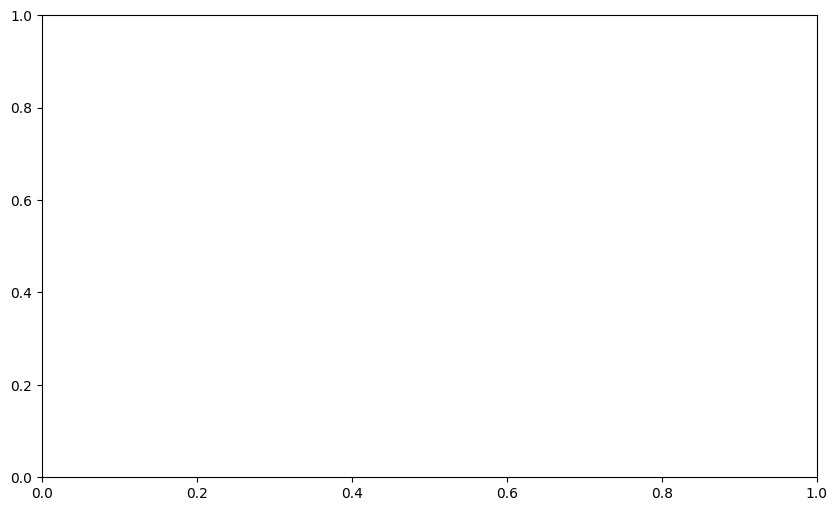

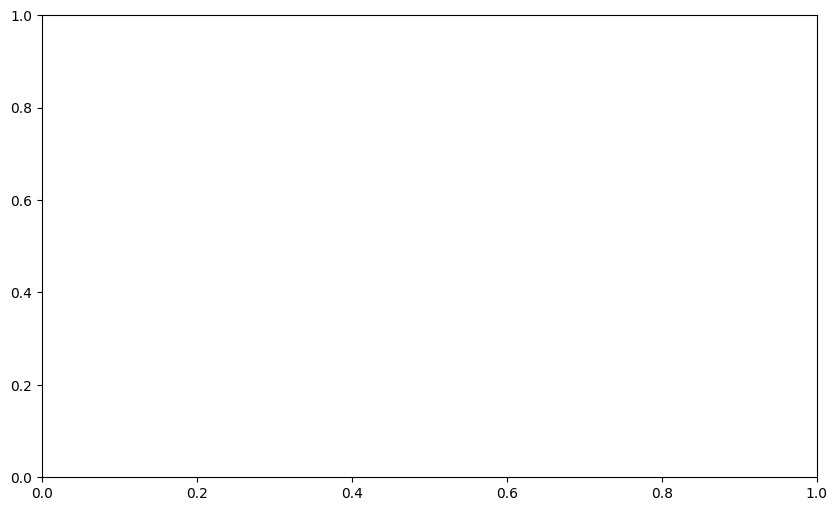

In [ ]:
import os
import pandas as pd
from pandasai import Agent

# Sample DataFrame
sales_by_country = pd.read_csv("/content/drive/MyDrive/SEM_2_PROJECT/datasets/visualization_Data.csv")

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
os.environ["PANDASAI_API_KEY"] = "$2a$10$W6UbS3Te6aW/ORn2ZngEnO4j3WdtsJCm7mWDeKL4AYEy.IrQzLYPW"

agent = Agent(sales_by_country)
agent.chat('plot sales yearly')

In [ ]:
!pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.86.236.23


In [ ]:
!streamlit/ run app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit/: No such file or directory
npx: installed 22 in 3.042s
your url is: https://three-peaches-make.loca.lt
^C


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2fqzuEv0TQoFtPbSveFL8B0S9XU_7MURCqE9acbJ4wQa15hCe #YOUR_AUTH_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Open an HTTP tunnel on port 8501
ngrok_tunnel = ngrok.connect(8501)

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-windows-amd64.zip


--2024-05-03 15:03:07--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-windows-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14091962 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-windows-amd64.zip’

ngrok-stable-window 100%[===================>]  13.44M  69.7MB/s    in 0.2s    

2024-05-03 15:03:08 (69.7 MB/s) - ‘ngrok-stable-windows-amd64.zip’ saved [14091962/14091962]



In [ ]:
!unzip ngrok-stable-windows-amd64.zip

Archive:  ngrok-stable-windows-amd64.zip
  inflating: ngrok.exe               


In [ ]:
!./ngrok http 8501

/bin/bash: line 1: ./ngrok: No such file or directory


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.86.236.23


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 4.65s
your url is: https://bumpy-sheep-hunt.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.236.23:8501



In [ ]:
import streamlit as st

In [ ]:
%%writefile app.py
st.title("Hello")

Writing app.py
